In [1]:
# -*- coding: utf-8 -*-
"""
Estimation of Distribution Algorithms

@author: Shu-wei Huang
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fa(x,y):
    return (x-0.5)**2+(y-0.5)**2

def fb(x,y):
    return (x-0.5+np.sin(10*(y-0.5)))**2+y**2

def circle_points(mean, cov, n_sd, n_pts):
    evals,EVecs=np.linalg.eig(cov)
    a=np.linspace(0,2*np.pi,n_pts)
    sd=n_sd*np.sqrt(evals)
    dx=np.zeros([2,n_pts])
    dx[0,:]=sd[0]*np.sin(a)
    dx[1,:]=sd[1]*np.cos(a)
    return (EVecs@dx).T + mean


In [2]:
def EDAs(f):
    "Initial random Gaussian distribution"
    mean = np.array([0,0])
    cov = np.array([[1,0],[0,1]])
    n_sample = 100
    
    e = cov[0,0] + cov[1,1]
    i = 0
    
    while e>0.0000001:
        "Generate N samples from Gaussian distribution"
        x = np.random.multivariate_normal(mean,cov,n_sample)
        Z_out = f(x[:,0],x[:,1])
        
        order = np.argsort(Z_out)
        Z_resort = Z_out[order]
        xy_resort = x[order]
        
        "Plot --> define x and y"
        t1=np.linspace(-1,1,150,endpoint=False)
        t2=np.linspace(-1,1,150,endpoint=False)
        T1, T2 = np.meshgrid(t1,t2)
        Z = f(T1,T2)
        
        if i%2==0:
            fig = plt.figure()
            ax = Axes3D(fig)
            cset = ax.contour3D(T1, T2, Z, 25)
            fig.colorbar(cset, shrink=1.0, aspect=20)
            ax.view_init(90, 0)
            plt.xlabel('X-Axis')
            plt.ylabel('Y-Axis')
            plt.title(['Function_A ', 'iteration = ', i+1])

            "Plot circle"
            circle_p= circle_points(mean, cov, 2, 250)
            ax.plot(circle_p[:,0],circle_p[:,1],c='orange')
            #plt.gca().set_aspect('equal', adjustable='box')
            "Plot upper 50% points"
            ax.scatter3D(xy_resort[0:50,0],xy_resort[0:50,1],Z_resort[0:50], c = 'g', marker = 'o')

            "Plot lower 50% points"
            ax.scatter3D(xy_resort[50:100,0],xy_resort[50:100,1],Z_resort[50:100], c = 'r', marker = 'x')
        
        "Calculate mean value and cov for next iteration"
        mean = np.mean(xy_resort[0:50,:],0)
        cov = np.cov(xy_resort[0:50,:].T)
        e = cov[0,0] + cov[1,1]
        i = i+1

    return print('The best estimate of the minimum position is [',
                 "{:.3f}".format(mean[0]),',',
                 "{:.3f}".format(mean[1]),'], The minima is ',
    "{:.3f}".format(f(mean[0],mean[1])))


The best estimate of the minimum position is [ 0.500 , 0.500 ], The minima is  0.000


D:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The best estimate of the minimum position is [ -0.463 , 0.001 ], The minima is  0.000


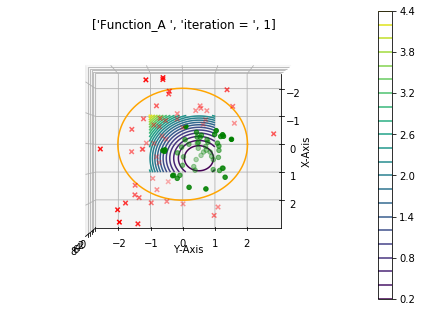

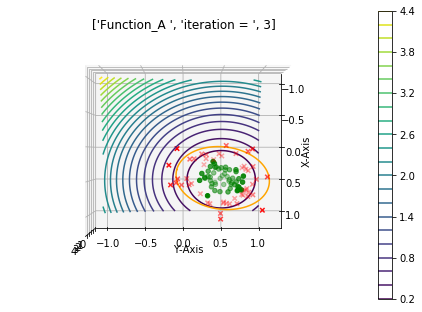

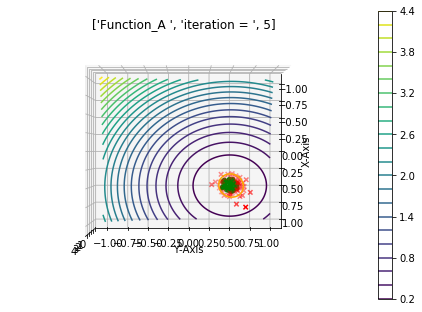

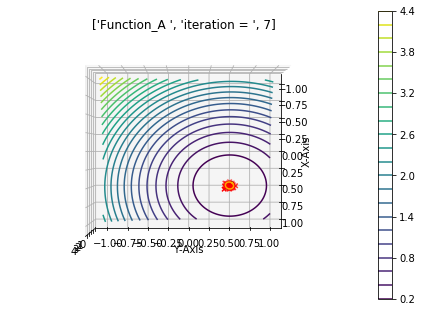

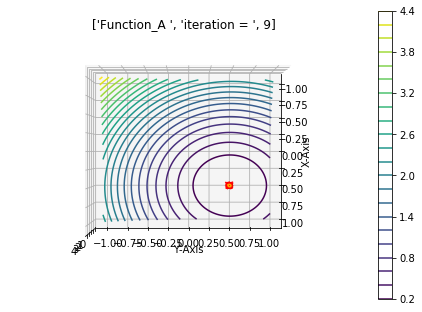

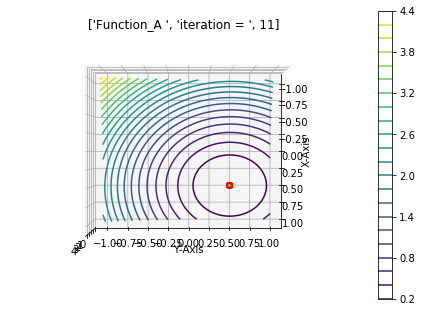

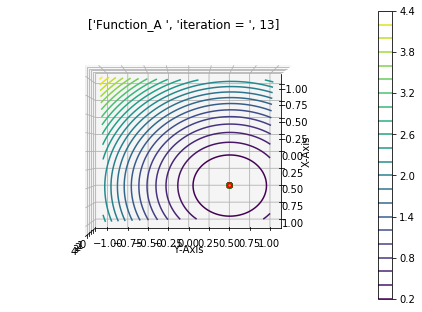

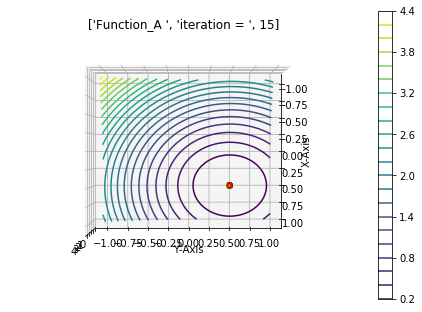

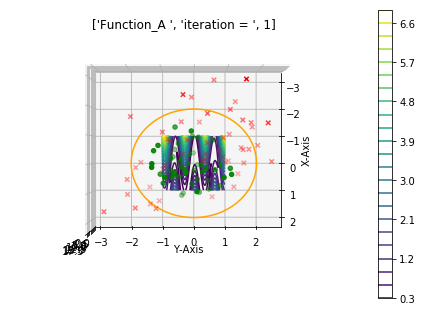

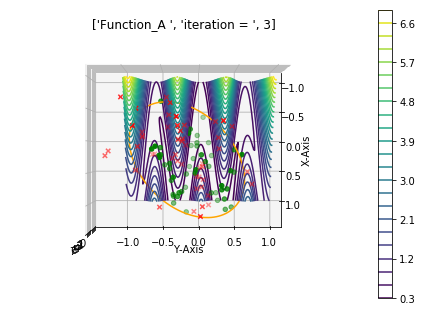

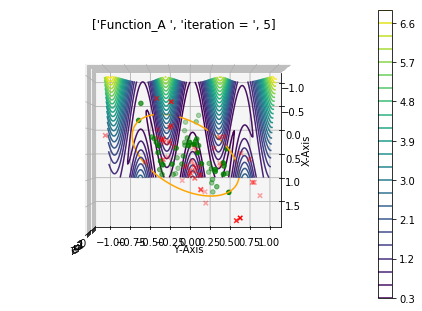

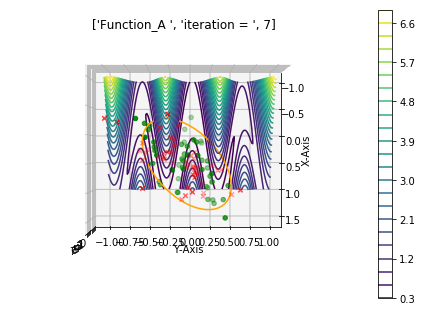

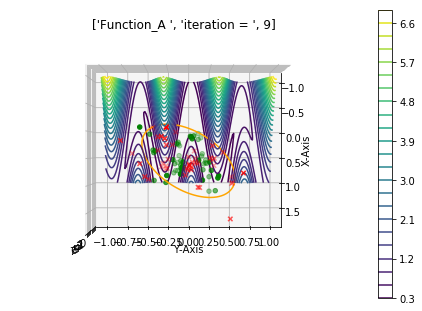

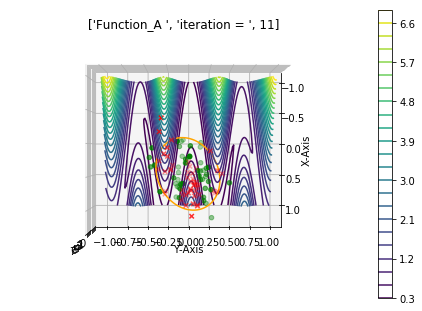

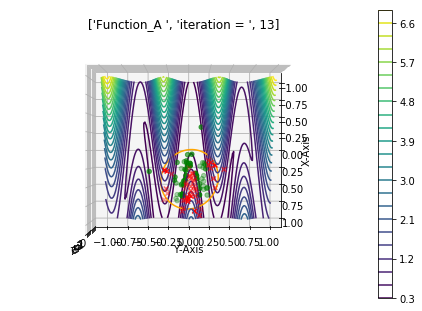

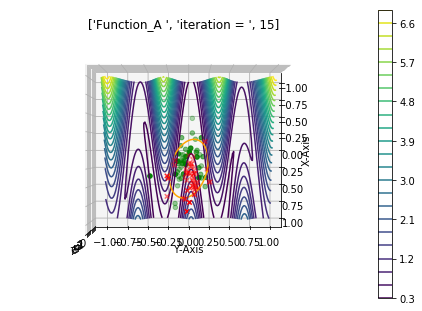

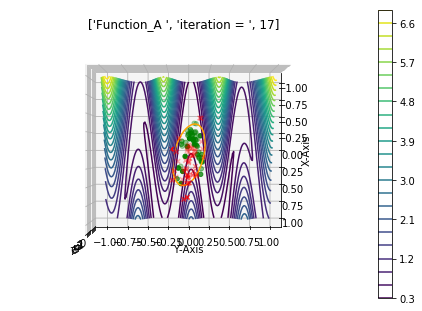

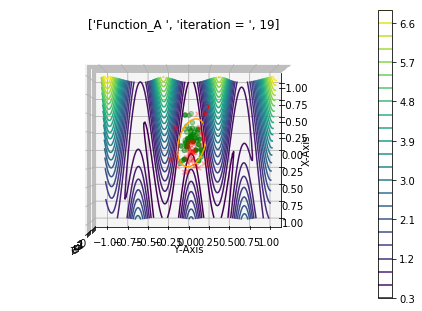

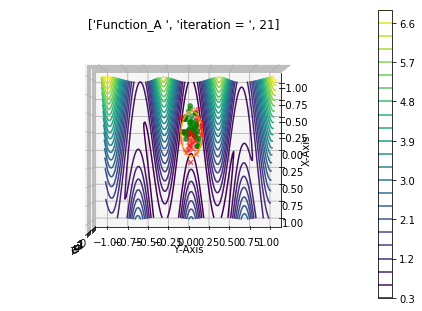

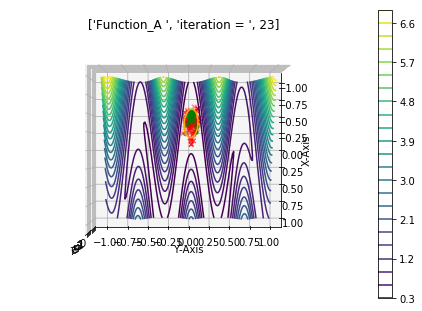

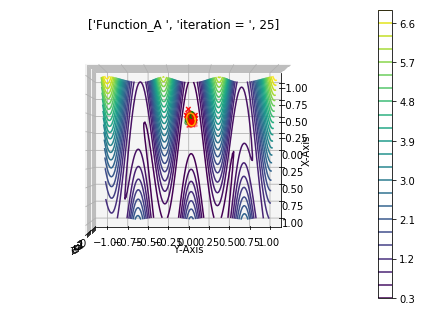

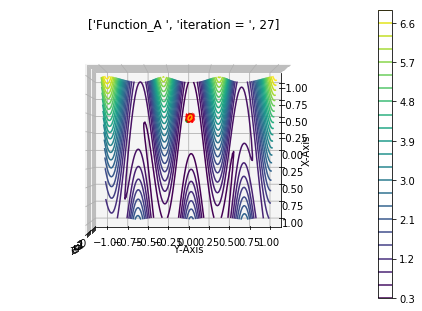

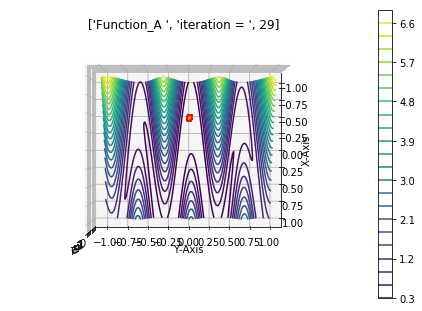

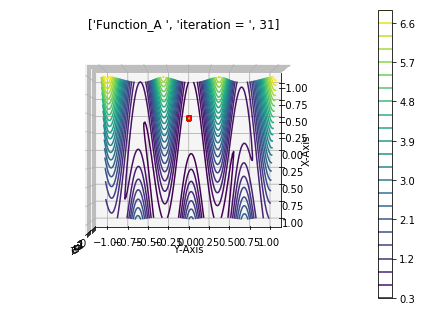

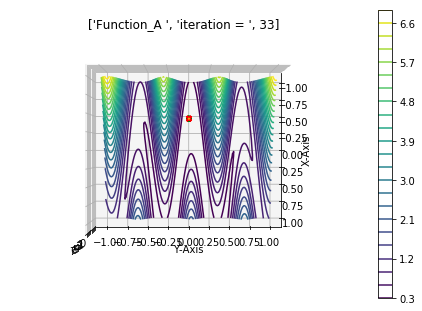

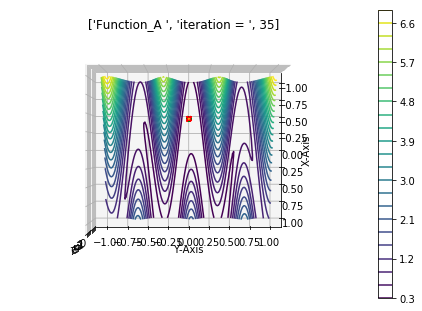

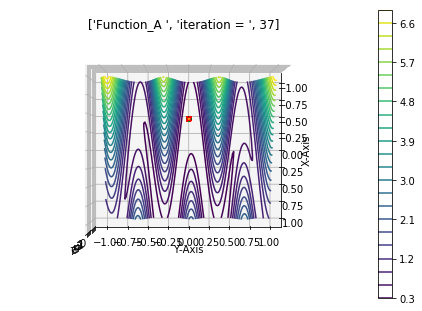

In [3]:
"""CALL FUNCTIONS"""
EDAs(fa)
EDAs(fb)